    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes


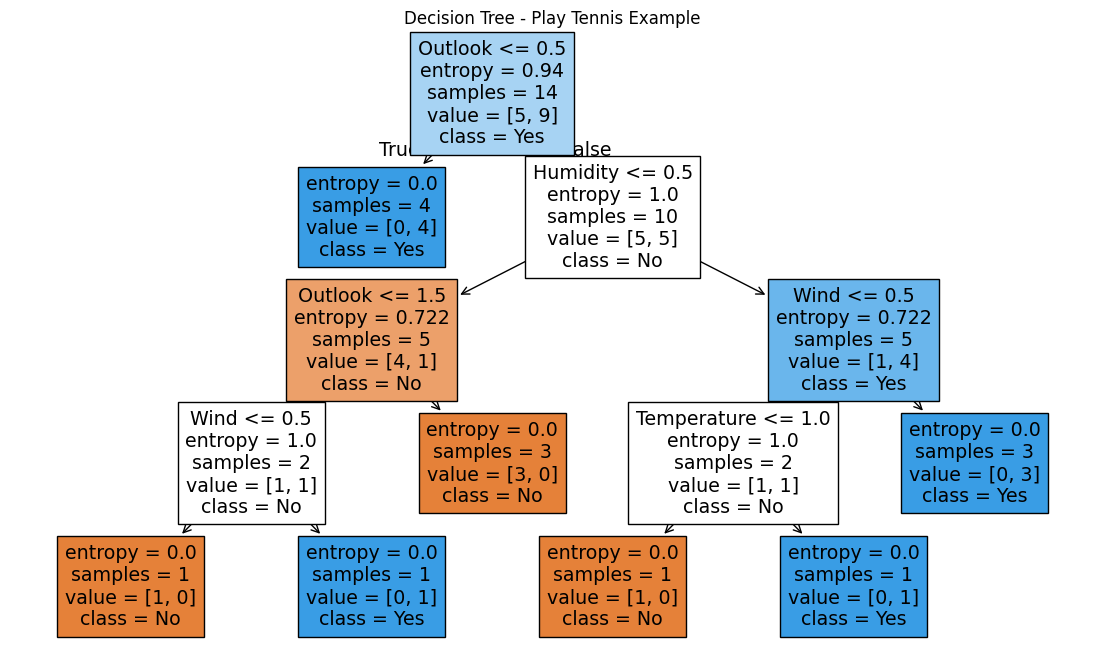

Prediction for test sample: [0]


In [1]:
# Decision Tree Classifier Example: Play Tennis Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ---- Step 1: Create the dataset ----
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                   'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                   'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                   'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
                   'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print(df.head())

# ---- Step 2: Encode categorical features ----
from sklearn.preprocessing import LabelEncoder

# Encode each column as numeric
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# ---- Step 3: Train Decision Tree (Entropy) ----
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)

# ---- Step 4: Visualize the tree ----
plt.figure(figsize=(14,8))
plot_tree(clf, filled=True, 
          feature_names=X.columns,
          class_names=label_encoders['PlayTennis'].classes_)
plt.title("Decision Tree - Play Tennis Example")
plt.show()

# ---- Step 5: Test prediction ----
test = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Strong']
})
# Encode using the same label encoders
for col in test.columns:
    test[col] = label_encoders[col].transform(test[col])

print("Prediction for test sample:", clf.predict(test))